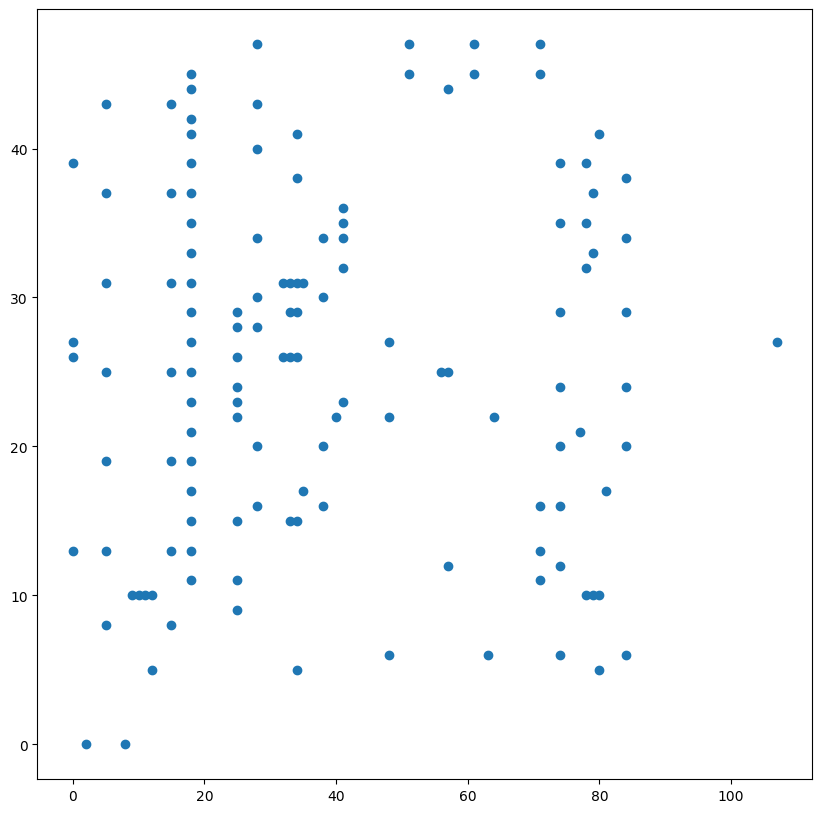

In [9]:
#Parte inicial, onde é importadas as bibliotecas que serão necessárias durante o código.
import random
import matplotlib.pyplot as plt
import numpy as np

# Função usada para ler o arquivo TSP
def ler_arquivo_tsp(nome_arquivo):
    with open(nome_arquivo, 'r') as f:
        linhas = f.readlines()

    # Encontre a linha com 'NODE_COORD_SECTION'
    for i in range(len(linhas)):
        if linhas[i].strip() == 'NODE_COORD_SECTION':
            break

    # As coordenadas começam após a linha 'NODE_COORD_SECTION'
    linhas = linhas[i+1:]

    coords = []
    for linha in linhas:
        partes = linha.strip().split()
        if len(partes) != 3:  # Ignore linhas que não são coordenadas
            continue
        coords.append((float(partes[1]), float(partes[2])))

    return coords

# Função usada para plotar o gráfico das coordenadas
def plotar_grafico(coords):
    x, y = zip(*coords)

    plt.figure(figsize=(10, 10))
    plt.scatter(x, y)
    plt.show()

# Ler o arquivo TSP e plotar as coordenadas
coords = ler_arquivo_tsp('Metaeu.tsp')
plotar_grafico(coords)

In [10]:
# Etapa aonde são calculadas as distâncias entre os pontos e definido o método de inicialização por meio do método do vizinho mais próximo
# Método em que o algoritmo constrói a rota visitando o vizinho mais próximo em cada etapa

# Função para calcular a distância euclidiana entre dois pontos
def distancia_euclidiana(p1, p2):
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

# Função para encontrar um caminho inicial usando o algoritmo do vizinho mais próximo
def vizinho_mais_proximo(coords):
    visitados = []
    nao_visitados = list(range(len(coords)))

    # Escolha uma cidade inicial aleatoriamente
    cidade_atual = random.choice(nao_visitados)
    visitados.append(cidade_atual)
    nao_visitados.remove(cidade_atual)

    while nao_visitados:
        proxima_cidade = min(nao_visitados, key=lambda x: distancia_euclidiana(coords[cidade_atual], coords[x]))
        nao_visitados.remove(proxima_cidade)
        visitados.append(proxima_cidade)
        cidade_atual = proxima_cidade

    return visitados

# Encontrar um caminho inicial usando o algoritmo do vizinho mais próximo
caminho_inicial = vizinho_mais_proximo(coords)

print("Caminho inicial: ", caminho_inicial)

Caminho inicial:  [122, 129, 120, 117, 113, 104, 99, 100, 101, 105, 106, 112, 107, 108, 114, 118, 115, 119, 116, 121, 128, 127, 126, 125, 124, 123, 111, 97, 92, 88, 73, 52, 44, 45, 53, 54, 46, 47, 48, 49, 50, 51, 55, 56, 57, 62, 66, 70, 75, 69, 65, 64, 61, 68, 78, 82, 83, 84, 85, 79, 71, 72, 58, 59, 60, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 18, 16, 15, 14, 13, 11, 5, 0, 6, 7, 1, 2, 8, 9, 3, 10, 23, 22, 21, 20, 19, 24, 17, 12, 4, 63, 67, 74, 76, 77, 80, 81, 86, 87, 91, 93, 98, 109, 110, 102, 103, 96, 95, 94, 89, 90, 130]


In [11]:
#Etapa onde os dados são inicializados e são calculadas as distancias das rotas

# Função para inicializar a população com permutações aleatórias das cidades
def inicializar_populacao(tamanho_populacao, num_cidades):
    populacao = []
    for _ in range(tamanho_populacao):
        rota = list(range(num_cidades))
        random.shuffle(rota)
        populacao.append(rota)
    return populacao

# Função para calcular a distância total de uma rota
def calcular_distancia_rota(rota, cidades):
    distancia = 0
    for i in range(len(rota) - 1):
        cidade_atual = rota[i]
        cidade_seguinte = rota[i + 1]
        distancia += distancia_euclidiana(cidades[cidade_atual], cidades[cidade_seguinte])
    distancia += distancia_euclidiana(cidades[rota[-1]], cidades[rota[0]])
    return distancia

In [12]:
# As funções a seguir são partes fundamentais do algoritmo genético que cria e modifica rotas (soluções) 
# para encontrar uma solução ótima ou próxima disso

# Função de seleção por torneio
# Essa função é usada para selecionar indivíduos para a próxima geração com base em seu desempenho
def selecao(populacao, cidades, num_selecionados):
    selecionados = []
    for _ in range(num_selecionados):
        torneio = random.sample(populacao, 20)
        melhor = min(torneio, key=lambda x: calcular_distancia_rota(x, cidades))
        selecionados.append(melhor)
    return selecionados

# Função para realizar o cruzamento (crossover) de dois pais
# Nessa função dois indivíduos "pais" são combinados para criar novos indivíduos "filhos"
def crossover(pai1, pai2):
    ponto_corte = random.randint(1, len(pai1) - 2)
    filho1 = pai1[:ponto_corte]
    for gene in pai2:
        if gene not in filho1:
            filho1.append(gene)
    filho2 = pai2[:ponto_corte]
    for gene in pai1:
        if gene not in filho2:
            filho2.append(gene)
    return filho1, filho2

# Função de mutação
# Essa função faz pequenas alterações aleatórias nas rotas para diversificar a população
def mutacao(individuo):
    i, j = random.sample(range(len(individuo)), 2)
    individuo[i], individuo[j] = individuo[j], individuo[i]

Geração 1: Melhor Distância = 643.8963115873647
Geração 2: Melhor Distância = 643.8963115873647
Geração 3: Melhor Distância = 643.8963115873647
Geração 4: Melhor Distância = 643.8963115873647
Geração 5: Melhor Distância = 643.8963115873647
Geração 6: Melhor Distância = 643.8963115873647
Geração 7: Melhor Distância = 643.8963115873647
Geração 8: Melhor Distância = 643.8963115873647
Geração 9: Melhor Distância = 643.8963115873647
Geração 10: Melhor Distância = 643.8963115873647
Geração 11: Melhor Distância = 643.8963115873647
Geração 12: Melhor Distância = 643.8963115873647
Geração 13: Melhor Distância = 643.8963115873647
Geração 14: Melhor Distância = 643.8963115873647
Geração 15: Melhor Distância = 643.8963115873647
Geração 16: Melhor Distância = 643.8963115873647
Geração 17: Melhor Distância = 643.197674645563
Geração 18: Melhor Distância = 643.197674645563
Geração 19: Melhor Distância = 643.197674645563
Geração 20: Melhor Distância = 643.197674645563
Geração 21: Melhor Distância = 64

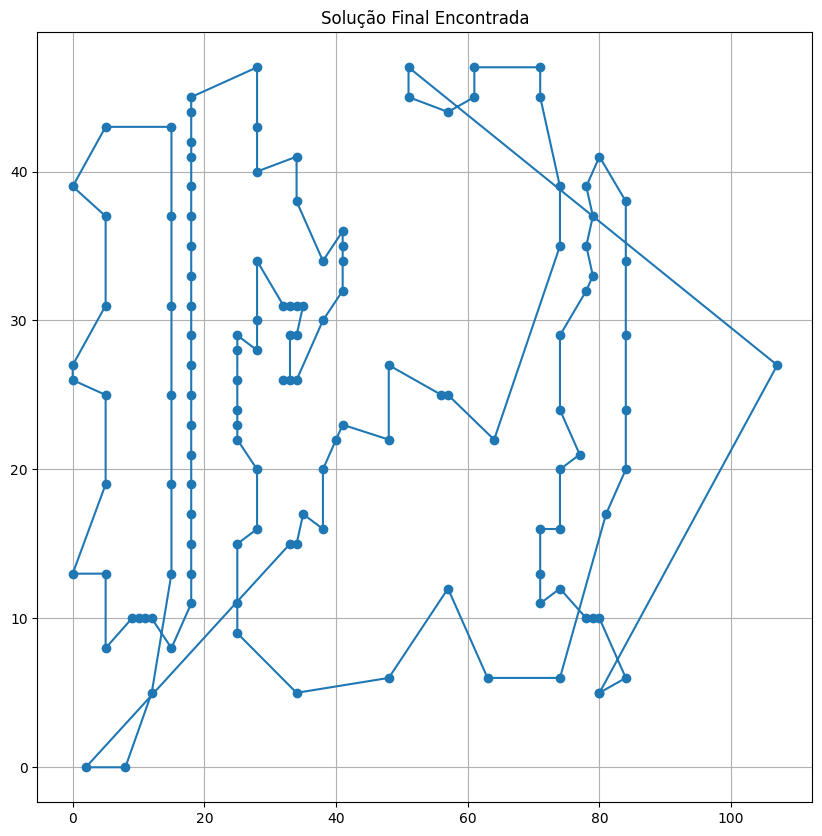

Melhor Rota Encontrada: [122, 129, 120, 117, 113, 104, 99, 100, 101, 105, 106, 112, 107, 108, 114, 118, 115, 119, 116, 121, 128, 127, 126, 125, 124, 123, 111, 97, 92, 88, 73, 52, 44, 45, 53, 54, 46, 47, 48, 49, 50, 51, 55, 56, 57, 62, 66, 70, 75, 69, 65, 64, 61, 68, 78, 82, 83, 84, 85, 79, 71, 72, 58, 59, 60, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 16, 15, 14, 13, 11, 5, 0, 6, 7, 1, 2, 8, 9, 3, 10, 23, 22, 21, 20, 19, 18, 17, 12, 4, 63, 67, 74, 76, 77, 80, 81, 86, 87, 91, 93, 98, 109, 110, 102, 103, 96, 95, 94, 89, 90, 130]
Melhor Distância Encontrada: 643.197674645563


In [13]:
# Etapa onde calcula a melhor rota da população atual, a sua distância e a média das distâncias das rotas da população
# Registra a melhor distância encontrada na lista melhores_distancias e a média das distâncias na lista medias_distancias
# Verifica se houve melhoria em relação à melhor distância anterior 
# Se sim, atualiza melhor_distancia_atual e reseta o contador geracoes_sem_melhoria, caso contrário, incrementa o contador
# Função do algoritmo genético
def algoritmo_genetico(num_geracoes, tamanho_populacao, taxa_mutacao, arquivo_tsp, num_geracoes_sem_melhoria):
    cidades = ler_arquivo_tsp(arquivo_tsp)
    num_cidades = len(cidades)
    populacao = [caminho_inicial.copy() for _ in range(tamanho_populacao)]
    
    melhor_distancia_atual = float('inf')
    geracoes_sem_melhoria = 0

    melhores_distancias = []
    medias_distancias = []

    for geracao in range(num_geracoes):
        populacao = selecao(populacao, cidades, tamanho_populacao)
        nova_populacao = []

        while len(nova_populacao) < tamanho_populacao:
            pai1, pai2 = random.sample(populacao, 2)
            filho1, filho2 = crossover(pai1, pai2)
            if random.random() < taxa_mutacao:
                mutacao(filho1)
            if random.random() < taxa_mutacao:
                mutacao(filho2)
            nova_populacao.extend([filho1, filho2])

        populacao = nova_populacao

        melhor_individuo = min(populacao, key=lambda x: calcular_distancia_rota(x, cidades))
        melhor_distancia = calcular_distancia_rota(melhor_individuo, cidades)

        print(f"Geração {geracao + 1}: Melhor Distância = {melhor_distancia}")

        melhores_distancias.append(melhor_distancia)
        media_distancias = sum(calcular_distancia_rota(individuo, cidades) for individuo in populacao) / tamanho_populacao
        medias_distancias.append(media_distancias)

        if melhor_distancia < melhor_distancia_atual:
            melhor_distancia_atual = melhor_distancia
            geracoes_sem_melhoria = 0
        else:
            geracoes_sem_melhoria += 1

        if geracoes_sem_melhoria >= num_geracoes_sem_melhoria:
            break

    # Plotagem dos pontos da solução final encontrada
    plt.figure(figsize=(10, 10))
    x = [cidades[i][0] for i in melhor_individuo]
    y = [cidades[i][1] for i in melhor_individuo]
    x.append(x[0])
    y.append(y[0])
    plt.plot(x, y, marker='o')
    plt.title("Solução Final Encontrada")
    plt.grid(True)
    plt.show()

    return melhor_individuo, melhor_distancia
# O loop das gerações continua até que num_geracoes sejam alcançadas 
# Ou até que geracoes_sem_melhoria atinja o limite especificado em num_geracoes_sem_melhoria
# Parâmetros do algoritmo
num_geracoes = 1000
tamanho_populacao = 500
taxa_mutacao = 0.06
arquivo_tsp = "Metaeu.tsp"
num_geracoes_sem_melhoria = 30

# Executa o algoritmo genético
melhor_rota, melhor_distancia = algoritmo_genetico(num_geracoes, tamanho_populacao, taxa_mutacao, arquivo_tsp, num_geracoes_sem_melhoria)
print(f"Melhor Rota Encontrada: {melhor_rota}")
print(f"Melhor Distância Encontrada: {melhor_distancia}")